In [103]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import gc

from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from time import time
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import DBSCAN
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [111]:
plt.rcParams.update({'figure.figsize': (13,13), 'axes.grid':False})

In [3]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')

In [4]:
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

print(train.shape)
print(test.shape)

(590540, 435)
(506691, 434)


In [6]:
y_train = train['isFraud'].copy()

# Drop target, fill in NaNs
X_train = train.drop('isFraud', axis=1)
X_test = test.copy()
X_train = X_train.fillna(-999)
X_test = X_test.fillna(-999)

In [7]:
train_transaction['num_col_not_null'] = train_transaction.notnull().sum(axis=1)
test_transaction['num_col_not_null'] = train_transaction.notnull().sum(axis=1)

In [12]:
for f in X_train.columns:
    if X_train[f].dtype=='object' or X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(X_test[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))
        X_test[f] = lbl.transform(list(X_test[f].values))

In [17]:
train

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [43]:
drop_list = []
for i in train.columns[2:]:
    if train[i].nunique()==1:
        drop_list.append(i)
    elif (float(train[i].value_counts().iloc[0])/len(X_train)) > 0.9:
        drop_list.append(i)
drop_list

reduced = X_train.drop(drop_list,axis=1)
reduced.shape

(590540, 380)

In [140]:
X_test = X_test.drop(drop_list,axis=1)

In [44]:
drop_list

['C3',
 'V98',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V129',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V281',
 'V284',
 'V286',
 'V290',
 'V293',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V305',
 'V309',
 'V311',
 'V316',
 'V318',
 'V319',
 'V320',
 'V321']

In [45]:
np.random.seed=42
reduced['random_sampling'] = np.random.random_sample(len(train))
reduced['random_sampling']

0         0.907725
1         0.597040
2         0.256757
3         0.868826
4         0.262421
5         0.505432
6         0.020796
7         0.480395
8         0.619710
9         0.499483
10        0.460028
11        0.988243
12        0.534323
13        0.272914
14        0.911888
15        0.030798
16        0.553704
17        0.338606
18        0.399299
19        0.854415
20        0.882693
21        0.863517
22        0.802782
23        0.611251
24        0.419951
25        0.221806
26        0.484628
27        0.686078
28        0.544425
29        0.364319
            ...   
590510    0.049271
590511    0.695287
590512    0.589655
590513    0.098229
590514    0.520916
590515    0.556644
590516    0.036070
590517    0.686726
590518    0.426650
590519    0.555853
590520    0.031818
590521    0.851822
590522    0.685614
590523    0.769947
590524    0.442100
590525    0.313281
590526    0.690510
590527    0.258663
590528    0.621796
590529    0.536402
590530    0.000788
590531    0.

In [47]:
reduced['isFraud'] = train['isFraud']
controls = reduced[reduced['isFraud']!=1]
controls = controls.sort_values('random_sampling')[:(len(train[train['isFraud']==1]))]
tests = reduced[reduced['isFraud']==1]
final = pd.concat([controls,tests])
final.reset_index(inplace=True, drop=True)
final

,TransactionID_x,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,random_sampling,isFraud
0,3248022,6280800,97.000,4,5618,390.0,150.0,3,224.0,3,...,0,0,0,0,0,0,0,0,0.000005,0
1,3032081,1092848,100.000,2,10486,514.0,150.0,3,219.0,2,...,99,4,2,2,2,2,1,2763,0.000006,0
2,3173069,4138681,57.950,4,2361,555.0,150.0,4,226.0,3,...,0,0,0,0,0,0,0,0,0.000008,0
3,3576489,15789705,117.000,4,2920,263.0,150.0,4,226.0,3,...,0,0,0,0,0,0,0,0,0.000009,0
4,3382818,9944617,35.950,4,15497,490.0,150.0,4,226.0,3,...,0,0,0,0,0,0,0,0,0.000010,0
5,3339570,8706115,34.500,4,12577,268.0,150.0,4,166.0,3,...,0,0,0,0,0,0,0,0,0.000010,0
6,3045804,1358342,25.000,1,4665,399.0,150.0,1,118.0,2,...,0,0,1,1,2,2,1,2527,0.000011,0
7,3421428,10977456,974.950,4,5033,269.0,150.0,3,224.0,3,...,0,0,0,0,0,0,0,0,0.000012,0
8,3570101,15597188,10.000,3,9112,250.0,150.0,4,226.0,3,...,0,0,0,0,0,0,0,0,0.000013,0
9,3463198,12329084,78.571,0,9082,141.0,185.0,4,226.0,2,...,0,0,0,0,0,0,0,0,0.000014,0


In [48]:
hip = final
hip['TransactionDT']=minmax_scale(np.array(hip['TransactionDT']).reshape(-1,1)) #.fit_transform(np.array(hip['TransactionDT']).reshape(-1,1))
hip

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


,TransactionID_x,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,random_sampling,isFraud
0,3248022,0.393928,97.000,4,5618,390.0,150.0,3,224.0,3,...,0,0,0,0,0,0,0,0,0.000005,0
1,3032081,0.063998,100.000,2,10486,514.0,150.0,3,219.0,2,...,99,4,2,2,2,2,1,2763,0.000006,0
2,3173069,0.257699,57.950,4,2361,555.0,150.0,4,226.0,3,...,0,0,0,0,0,0,0,0,0.000008,0
3,3576489,0.998650,117.000,4,2920,263.0,150.0,4,226.0,3,...,0,0,0,0,0,0,0,0,0.000009,0
4,3382818,0.626930,35.950,4,15497,490.0,150.0,4,226.0,3,...,0,0,0,0,0,0,0,0,0.000010,0
5,3339570,0.548167,34.500,4,12577,268.0,150.0,4,166.0,3,...,0,0,0,0,0,0,0,0,0.000010,0
6,3045804,0.080882,25.000,1,4665,399.0,150.0,1,118.0,2,...,0,0,1,1,2,2,1,2527,0.000011,0
7,3421428,0.692613,974.950,4,5033,269.0,150.0,3,224.0,3,...,0,0,0,0,0,0,0,0,0.000012,0
8,3570101,0.986407,10.000,3,9112,250.0,150.0,4,226.0,3,...,0,0,0,0,0,0,0,0,0.000013,0
9,3463198,0.778571,78.571,0,9082,141.0,185.0,4,226.0,2,...,0,0,0,0,0,0,0,0,0.000014,0


# More feature creation

In [78]:
train_transaction.filter(regex='email',axis=1)

,P_emaildomain,R_emaildomain
0,NaN,NaN
1,gmail.com,NaN
2,outlook.com,NaN
3,yahoo.com,NaN
4,gmail.com,NaN
5,gmail.com,NaN
6,yahoo.com,NaN
7,mail.com,NaN
8,anonymous.com,NaN
9,yahoo.com,NaN


In [81]:
hip['email_PR_match'] = 0
hip['email_PR_match'] = np.where(hip['P_emaildomain']==hip['R_emaildomain'], hip['email_PR_match'], 1)
hip['email_PR_match']

0        1
1        0
2        0
3        1
4        1
5        1
6        1
7        1
8        1
9        0
10       0
11       1
12       1
13       0
14       1
15       0
16       1
17       1
18       0
19       0
20       1
21       0
22       0
23       0
24       1
25       1
26       1
27       0
28       1
29       0
        ..
41296    1
41297    1
41298    0
41299    1
41300    1
41301    0
41302    0
41303    0
41304    0
41305    0
41306    0
41307    0
41308    1
41309    0
41310    0
41311    0
41312    1
41313    1
41314    1
41315    1
41316    1
41317    1
41318    1
41319    0
41320    0
41321    1
41322    0
41323    0
41324    1
41325    0
Name: email_PR_match, Length: 41326, dtype: int64

# Run overnight

In [139]:
len(hip._get_numeric_data().columns),len(hip.columns)

(384, 384)

In [50]:
X = np.array(hip.iloc[:,1:-2].fillna(-999))

In [137]:
X.min()

-999.0

In [ ]:
reducer = umap.UMAP(
        random_state=42, n_components=2 #metric='cosine'
    )
X_embedded = reducer.fit_transform(X)

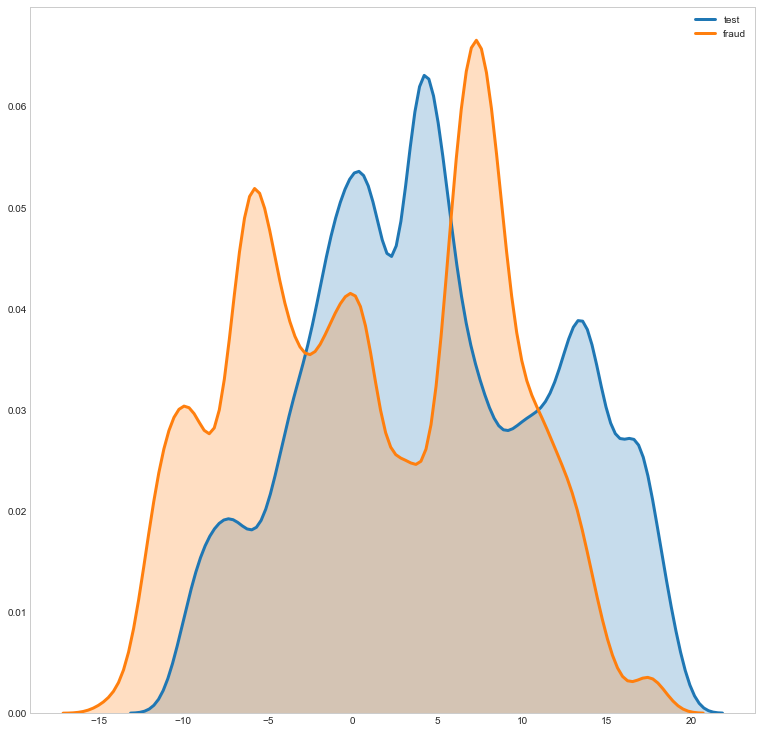

In [59]:
sns.distplot(X_embedded[:,0], hist=False, kde=True, kde_kws = {'shade':True, 'linewidth':3}, label = 'test')
sns.distplot(X_embedded[:,1], hist=False, kde=True, kde_kws = {'shade':True, 'linewidth':3}, label = 'fraud')

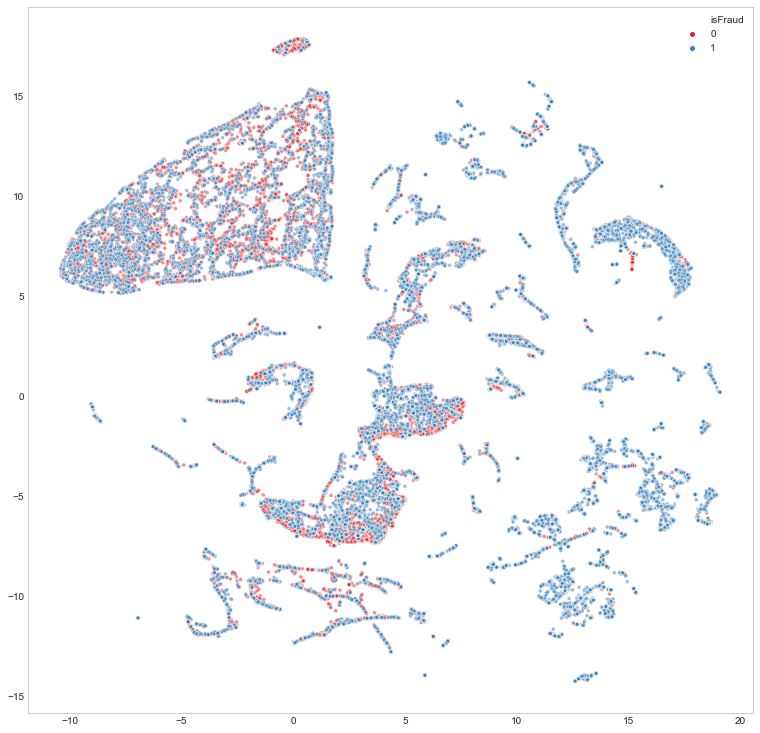

In [64]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = hip.isFraud, palette='Set1',
                size = hip.isFraud, sizes = [15,15], alpha=0.5)

In [98]:
labels = DBSCAN(eps =2, min_samples = 1000).fit_predict(X_embedded)

In [99]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

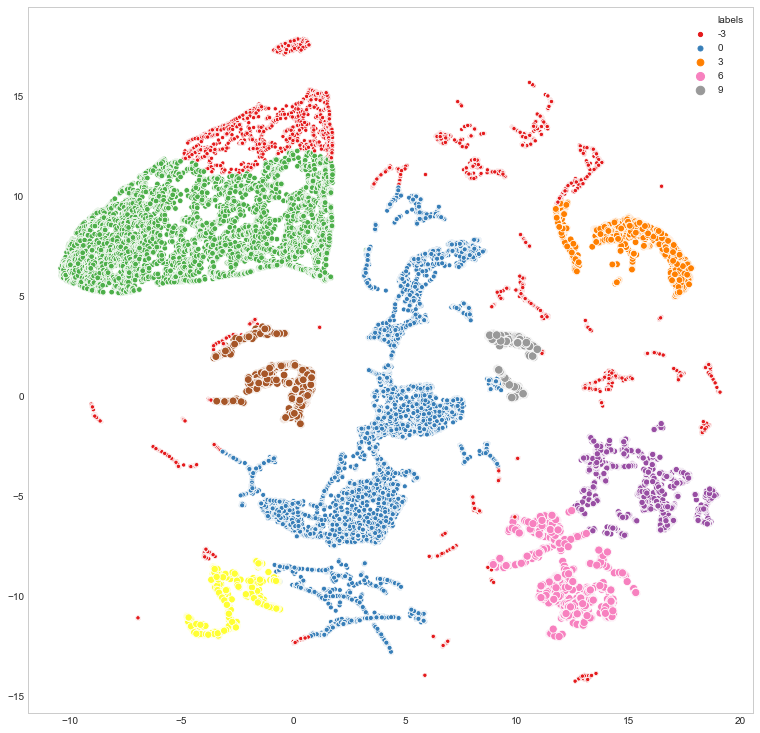

In [101]:
hip['labels']=labels
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = hip.labels, palette='Set1',
                size = hip.labels)

In [102]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [ ]:
X_pca = PCA(n_components=50, random_state=42).fit_transform(X)
X_embedded2 = TSNE(n_components=2, perplexity=30, metric = 'canberra', random_state=42).fit_transform(X_pca)

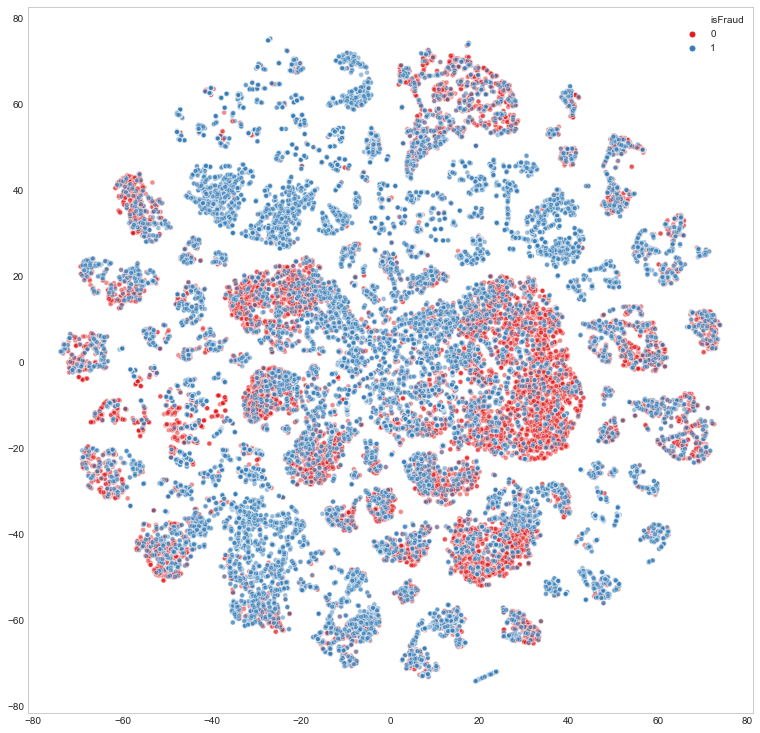

In [65]:
sns.scatterplot(X_embedded2[:,0], X_embedded2[:,1], hue = final.isFraud, palette='Set1',
            size = final.isFraud, 
               sizes = [25,25], alpha=0.5)

In [105]:
mu_ctrl= []
st_ctrl= []
mu_tar= []
st_tar= []
for i in hip._get_numeric_data():
    mu_ctrl.append(np.mean(hip[hip['isFraud']==0][i]))
    st_ctrl.append(np.std(hip[hip['isFraud']==0][i]))
    mu_tar.append(np.mean(hip[hip['isFraud']==1][i]))
    st_tar.append(np.std(hip[hip['isFraud']==1][i]))

pop_tabl = pd.DataFrame({'mu_ctrl':mu_ctrl,'st_ctrl':st_ctrl,'mu_tar':mu_tar,'st_tar':st_tar})
pop_tabl

,mu_ctrl,st_ctrl,mu_tar,st_tar
0,3.281818e+06,171075.324047,3.294952e+06,162036.407369
1,4.626979e-01,0.294497,4.835484e-01,0.280866
2,1.345380e+02,237.318197,1.492448e+02,232.206544
3,3.263805e+00,1.386584,2.050041e+00,1.842098
4,9.911185e+03,4893.069906,9.547654e+03,4761.936148
5,3.445734e+02,221.949513,3.374403e+02,249.568299
6,1.499239e+02,58.722466,1.601766e+02,53.351938
7,3.607269e+00,0.615343,3.593234e+00,0.619894
8,1.914490e+02,105.926360,1.798901e+02,127.843275
9,2.748972e+00,0.451002,2.512801e+00,0.511039


In [106]:
pop_tabl['mu_diff'] = np.abs(np.array(pop_tabl['mu_ctrl']) - np.array(pop_tabl['mu_tar']))/np.array(pop_tabl['mu_ctrl'])
pop_tabl['st_diff'] = np.abs(np.array(pop_tabl['st_ctrl']) - np.array(pop_tabl['st_tar']))/np.array(pop_tabl['st_ctrl'])
pop_tabl.sort_values('mu_diff',ascending=False)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


,mu_ctrl,st_ctrl,mu_tar,st_tar,mu_diff,st_diff
381,0.000000,0.000000,1.000000,0.000000,inf,NaN
380,0.018186,0.010525,0.497510,0.290159,26.357004,26.567570
26,3.341528,79.758161,18.597541,162.078538,4.565579,1.032125
21,2.376567,56.995751,11.977157,115.140391,4.039689,1.020157
22,4.379229,88.221749,21.242608,176.691495,3.850765,1.002811
24,4.556696,88.802446,19.493926,176.914905,3.278084,0.992230
18,3.628854,64.514050,15.077336,125.670697,3.154848,0.947959
17,13.948168,142.349745,45.509413,287.806684,2.262752,1.021828
10,158.678943,401.882419,-190.199535,631.337389,2.198644,0.570951
147,0.311475,29.103632,-0.239510,28.686223,1.768956,0.014342


In [109]:
hip.columns[26]

'C12'

In [ ]:
reduced._get_numeric_data().columns[78]

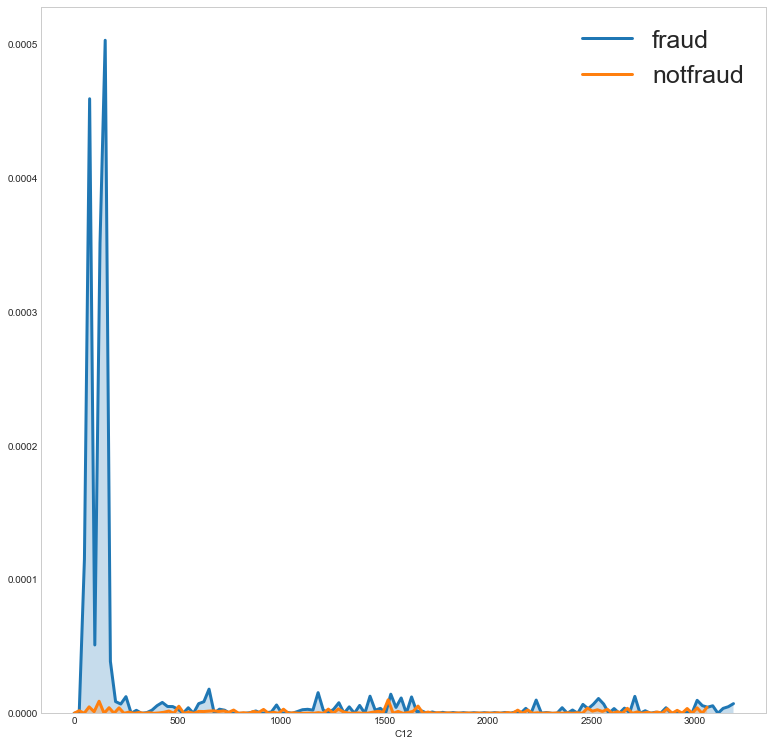

In [115]:
sns.distplot(hip[hip['isFraud']==1]['C12'], hist=False, kde=True, kde_kws = {'shade':True, 'linewidth':3}, label ='fraud')
sns.distplot(hip[hip['isFraud']==0]['C12'], hist=False, kde=True, kde_kws = {'shade':True, 'linewidth':3}, label='notfraud')
plt.legend(fontsize=25)

In [124]:
hip.columns[21]

'C7'

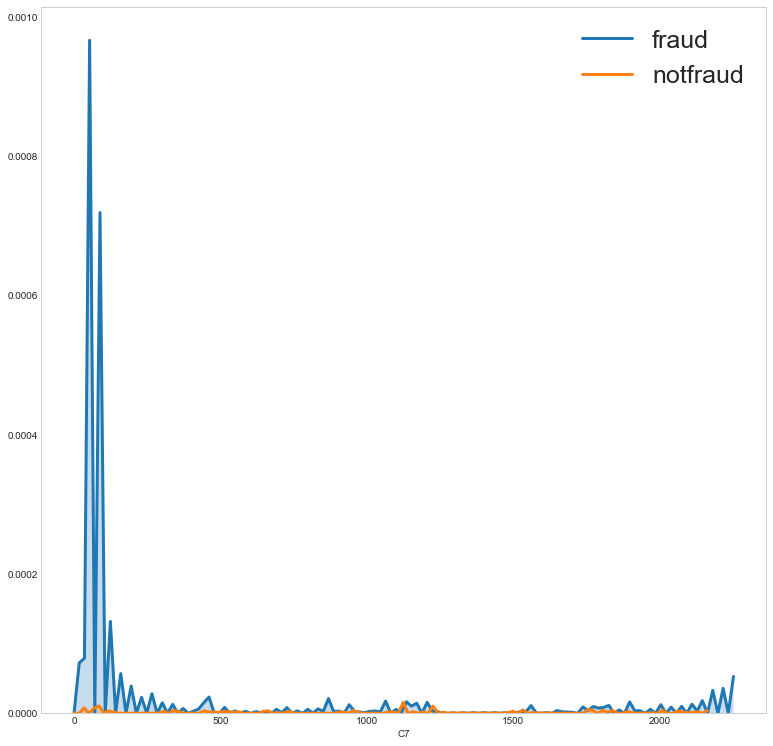

In [117]:
sns.distplot(final[final['isFraud']==1]['C7'], hist=False, kde=True, kde_kws = {'shade':True, 'linewidth':3}, label = 'fraud')
sns.distplot(final[final['isFraud']==0]['C7'], hist=False, kde=True, kde_kws = {'shade':True, 'linewidth':3}, label = 'notfraud')
plt.legend(fontsize=25)

In [125]:
hip.columns[22]

'C8'

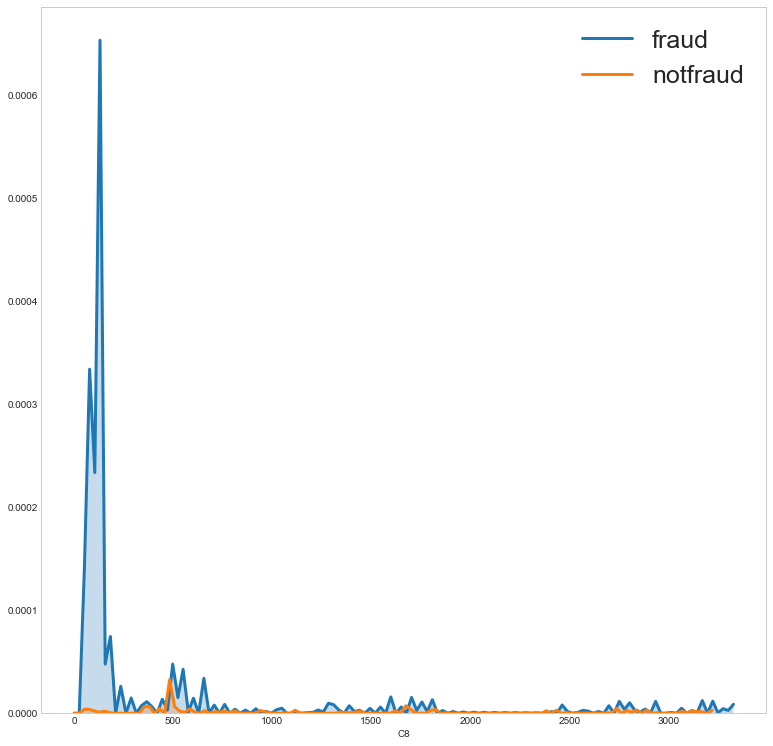

In [121]:
sns.distplot(final[final['isFraud']==1]['C8'], hist=False, kde=True, kde_kws = {'shade':True, 'linewidth':3}, label = 'fraud')
sns.distplot(final[final['isFraud']==0]['C8'], hist=False, kde=True, kde_kws = {'shade':True, 'linewidth':3}, label = 'notfraud')
plt.legend(fontsize=25)

In [126]:
further_reduction = pop_tabl[pop_tabl['mu_diff']>=0.1]
further_reduction.reset_index(inplace=True)

In [127]:
further_reduction.sort_values('index')

,index,mu_ctrl,st_ctrl,mu_tar,st_tar,mu_diff,st_diff
0,2,134.537974,2.373182e+02,149.244779,2.322065e+02,0.109313,0.021539
1,3,3.263805,1.386584e+00,2.050041,1.842098e+00,0.371886,0.328515
2,10,158.678943,4.018824e+02,-190.199535,6.313374e+02,2.198644,0.570951
3,15,4.383149,1.076473e+01,10.823404,1.259171e+01,1.469322,0.169719
4,16,13.134685,1.232799e+02,35.535740,2.429704e+02,1.705489,0.970883
5,17,13.948168,1.423497e+02,45.509413,2.878067e+02,2.262752,1.021828
6,18,3.628854,6.451405e+01,15.077336,1.256707e+02,3.154848,0.947959
7,19,5.882592,2.674765e+01,1.406717,1.294578e+01,0.760868,0.516003
8,20,8.743793,6.730774e+01,16.923148,1.262957e+02,0.935447,0.876392
9,21,2.376567,5.699575e+01,11.977157,1.151404e+02,4.039689,1.020157


In [ ]:
np.arange(0,len(hip))

In [ ]:
reduced._get_numeric_data().columns[6]

In [ ]:
hop = hip._get_numeric_data()
final_reduced = hop[hop.columns[further_reduction['index']]]
final_reduced

In [ ]:
final_reduced.info()

In [128]:
corr_matrix = hip.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [134]:
len(to_drop)
drop_list = list(set(to_drop).difference(set(['isFraud'])))
final = hip.drop(to_drop,axis=1)
final.shape

(41326, 106)

In [142]:
final

,TransactionID_x,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_33,id_35,id_38,DeviceType,DeviceInfo,random_sampling,isFraud,email_PR_match,labels
0,3248022,97.000,4,5618,390.0,150.0,3,224.0,3,315.0,...,0,0,0,0,0,0,0.000005,0,1,0
1,3032081,100.000,2,10486,514.0,150.0,3,219.0,2,-999.0,...,92,99,2,2,1,2763,0.000006,0,0,1
2,3173069,57.950,4,2361,555.0,150.0,4,226.0,3,436.0,...,0,0,0,0,0,0,0.000008,0,0,0
3,3576489,117.000,4,2920,263.0,150.0,4,226.0,3,122.0,...,0,0,0,0,0,0,0.000009,0,1,0
4,3382818,35.950,4,15497,490.0,150.0,4,226.0,3,299.0,...,0,0,0,0,0,0,0.000010,0,1,0
5,3339570,34.500,4,12577,268.0,150.0,4,166.0,3,110.0,...,0,0,0,0,0,0,0.000010,0,1,4
6,3045804,25.000,1,4665,399.0,150.0,1,118.0,2,299.0,...,50,0,1,2,1,2527,0.000011,0,1,-1
7,3421428,974.950,4,5033,269.0,150.0,3,224.0,3,203.0,...,0,0,0,0,0,0,0.000012,0,1,0
8,3570101,10.000,3,9112,250.0,150.0,4,226.0,3,441.0,...,0,0,0,0,0,0,0.000013,0,1,-1
9,3463198,78.571,0,9082,141.0,185.0,4,226.0,2,-999.0,...,0,0,0,0,0,0,0.000014,0,0,2


# Model

In [143]:
X_test = test.copy()
X_test = X_test[final.iloc[:,:-4].columns]
X_test['email_PR_match'] = 0
X_test['email_PR_match'] = np.where(X_test['P_emaildomain']==X_test['R_emaildomain'], X_test['email_PR_match'], 1)
X_test['email_PR_match']
X_test

,TransactionID_x,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_16,id_18,id_30,id_31,id_33,id_35,id_38,DeviceType,DeviceInfo,email_PR_match
0,3663549,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NotFound,15.0,NaN,chrome 67.0 for android,NaN,F,F,mobile,MYA-L13 Build/HUAWEIMYA-L13,1
1,3663550,49.000,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,Found,NaN,Android 6.0.1,chrome 67.0 for android,1280x720,T,T,mobile,LGLS676 Build/MXB48T,1
2,3663551,171.000,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NotFound,NaN,NaN,ie 11.0 for tablet,NaN,F,F,desktop,Trident/7.0,1
3,3663552,284.950,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,Found,15.0,NaN,chrome 67.0 for android,NaN,F,F,mobile,MYA-L13 Build/HUAWEIMYA-L13,1
4,3663553,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NotFound,15.0,NaN,chrome 67.0 for android,NaN,F,F,mobile,SM-G9650 Build/R16NW,1
5,3663554,57.950,W,12839,321.0,150.0,visa,226.0,debit,512.0,...,NotFound,15.0,iOS 11.4.0,mobile safari 11.0,2208x1242,T,T,mobile,iOS Device,1
6,3663555,87.000,W,16560,476.0,150.0,visa,126.0,debit,110.0,...,Found,15.0,iOS 11.4.0,mobile safari 11.0,2208x1242,T,T,mobile,iOS Device,1
7,3663556,390.000,W,15066,170.0,150.0,mastercard,102.0,credit,194.0,...,Found,15.0,iOS 11.4.0,mobile safari 11.0,2208x1242,T,T,mobile,iOS Device,1
8,3663557,103.950,W,2803,100.0,150.0,visa,226.0,debit,494.0,...,Found,15.0,iOS 11.4.0,mobile safari 11.0,2208x1242,T,T,mobile,iOS Device,1
9,3663558,117.000,W,12544,321.0,150.0,visa,226.0,debit,476.0,...,NotFound,NaN,iOS 11.4.0,mobile safari 11.0,2048x1536,T,F,mobile,iOS Device,1


In [151]:
X_test['num_col_not_null'] = train_transaction.notnull().sum(axis=1)
final['num_col_not_null'] = train_transaction.notnull().sum(axis=1)
X_train = final.drop(['isFraud','labels','random_sampling'],axis=1)

In [152]:
X_test.shape, X_train.shape

((506691, 104), (41326, 104))

In [165]:
X_train.set_index('TransactionID_x')
X_test.set_index('TransactionID_x')

for f in X_train.columns:
    if X_train[f].dtype=='object' or X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(X_test[f].values))
        X_test[f] = lbl.transform(list(X_test[f].values))

In [172]:
y_train = final['isFraud']

In [173]:
len(y_train[y_train==1])

20663

In [174]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf = RFC(n_estimators = 100, random_state=42)
clf.fit(np.array(X_train), np.array(y_train))
submission1 = pd.DataFrame(clf.predict_proba(X_test.fillna(-999)))
submission1

,0,1
0,0.71,0.29
1,0.73,0.27
2,0.68,0.32
3,0.65,0.35
4,0.54,0.46
5,0.61,0.39
6,0.45,0.55
7,0.42,0.58
8,0.59,0.41
9,0.60,0.40


In [175]:
s1 = pd.DataFrame(submission1)
s1 = submission1.drop(0,axis=1)
s1['TransactionID'] = test_transaction['TransactionID']
s1.columns = ['isFraud','TransactionID']
s1=s1[['TransactionID','isFraud']]
s1

,TransactionID,isFraud
0,3663549,0.29
1,3663550,0.27
2,3663551,0.32
3,3663552,0.35
4,3663553,0.46
5,3663554,0.39
6,3663555,0.55
7,3663556,0.58
8,3663557,0.41
9,3663558,0.40


In [176]:
s1.to_csv(path_or_buf = 'submission1_revise', index=False)

In [177]:
X_train = np.array(X_train)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from umap import UMAP

svc = LinearSVC(dual=False, random_state=42)
params_grid = {"C": [10**k for k in range(-3,4)]}
clf = GridSearchCV(svc, params_grid, cv=5)
clf.fit(X_train, y_train)
umap = UMAP(random_state=42)

pipeline = Pipeline([("umap", umap),
                     ("svc", svc)])

params_grid_pipeline = {"umap__n_neighbors": [5, 20, 35, 50],
                       "umap__n_components":[15,25,50],
                       "svc__C": [10**k for k in range(-3,4)]}

clf_pipeline = GridSearchCV(pipeline, params_grid_pipeline)
clf_pipeline.fit(X_train, y_train)

submission2 = clf_pipeline.predict_proba(X_test.fillna(-999))
s2 = pd.DataFrame(submission2)
s2

In [ ]:
s2 = submission1.drop(0,axis=1)
s2['TransactionID'] = test_transaction['TransactionID']
s2.columns = ['isFraud','TransactionID']
s2=s2[['TransactionID','isFraud']]
s2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [120, 300, 500, 800, 1200]
# Number of features to consider at every split
max_features = ['Log2', 'sqrt']
max_features.append(None)
# Maximum number of levels in tree
max_depth = [5, 8, 15, 25, 30]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(np.array(final_reduced.iloc[:,:-1].fillna(-999)), np.array(final_reduced.iloc[:,-1].fillna(-999)))

submission3 = rfc_random.predict_proba(test_case)
s3 = pd.DataFrame(submission3)
s3

In [ ]:
FILL NA -999
gc.collect()

In [ ]:
from sklearn import preprocessing
import xgboost as xgb

train_transaction = pd.read_csv('../input/train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('../input/test_transaction.csv', index_col='TransactionID')

train_identity = pd.read_csv('../input/train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('../input/test_identity.csv', index_col='TransactionID')

sample_submission = pd.read_csv('../input/sample_submission.csv', index_col='TransactionID')

train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

print(train.shape)
print(test.shape)

y_train = train['isFraud'].copy()

# Drop target, fill in NaNs
X_train = train.drop('isFraud', axis=1)
X_test = test.copy()
X_train = X_train.fillna(-999)
X_test = X_test.fillna(-999)




for f in X_train.columns:
    if X_train[f].dtype=='object' or X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(X_test[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))
        X_test[f] = lbl.transform(list(X_test[f].values))
        

